In [1]:
import simulate_data 
import matplotlib.pyplot as plt

In [2]:
sim_data = simulate_data.FirmPanelSimulator()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [3]:
data = sim_data.simulate()

In [4]:
print(data[data['firm_id']==99])

      firm_id  year  entry_year  exit_year  firm_age  treated  first_treat  \
1078       99  2000        2000       2010         0        0          NaN   
1079       99  2001        2000       2010         1        0          NaN   
1080       99  2002        2000       2010         2        0          NaN   
1082       99  2004        2000       2010         4        0          NaN   
1083       99  2005        2000       2010         5        0          NaN   
1084       99  2006        2000       2010         6        0          NaN   
1085       99  2007        2000       2010         7        0          NaN   
1086       99  2008        2000       2010         8        0          NaN   
1088       99  2010        2000       2010        10        0          NaN   

       firm_fe   year_fe  post_treatment        y1        y2  
1078 -0.468496  0.089957           False -0.418873  0.773289  
1079 -0.468496  0.418915           False  0.995780  0.664583  
1080 -0.468496 -0.050997      

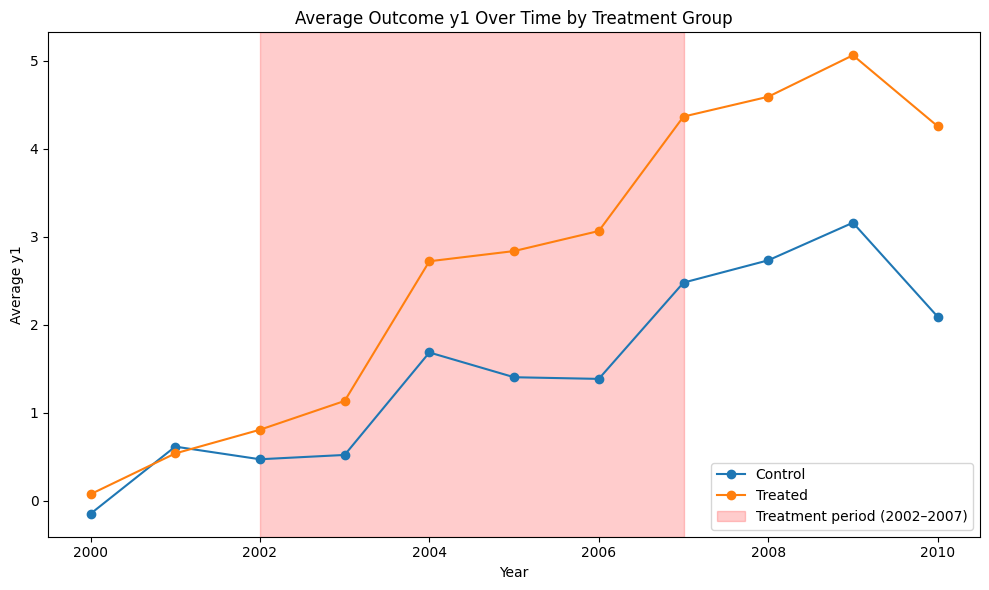

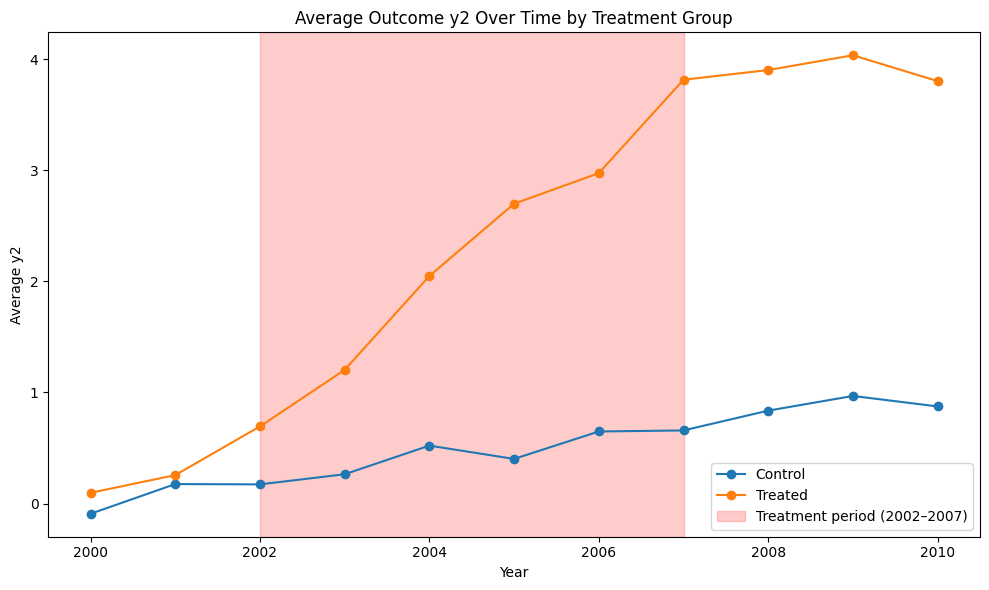

In [6]:
# Aggregate y1 and y2 by treated status and year
agg = data.groupby(['treated', 'year'])[['y1', 'y2']].mean().reset_index()
agg['treated_label'] = agg['treated'].map({0: 'Control', 1: 'Treated'})

# Plot y1 trends
plt.figure(figsize=(10, 6))
for label, group in agg.groupby('treated_label'):
    plt.plot(group['year'], group['y1'], label=f'{label}', marker='o')

plt.axvspan(2002, 2007, color='red', alpha=0.2, label='Treatment period (2002–2007)')
plt.title('Average Outcome y1 Over Time by Treatment Group')
plt.xlabel('Year')
plt.ylabel('Average y1')
plt.legend()
plt.tight_layout()
plt.show()

# Plot y2 trends
plt.figure(figsize=(10, 6))
for label, group in agg.groupby('treated_label'):
    plt.plot(group['year'], group['y2'], label=f'{label}', marker='o')

plt.axvspan(2002, 2007, color='red', alpha=0.2, label='Treatment period (2002–2007)')
plt.title('Average Outcome y2 Over Time by Treatment Group')
plt.xlabel('Year')
plt.ylabel('Average y2')
plt.legend()
plt.tight_layout()
plt.show()